# LINEAR REGRESSION WITH TENSORFLOW

<b>In this notebook we will overview the implementation of Linear Regression with TensorFlow<b>

<h2>Table of Contents</h2>
<ol>
 <li><a href="#ref1">Linear Regression</a></li>
 <li><a href="#ref2">Linear Regression with TensorFlow</a></li>
</ol>
</div>
<hr>

<a id="ref1"></a>
<h1>Linear Regression</h1>

Defining a linear regression in simple terms, is the approximation of a linear model used to describe the relationship between two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the "state" or "final goal" that we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the "causes" of the "states". 

When more than one independent variable is present the process is called multiple linear regression. <br>
When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and <b>a</b> and <b>b</b> being the parameters we adjust. <b>a</b> is known as "slope" or "gradient" and <b>b</b> is the "intercept". You can interpret this equation as Y being a function of X, or Y being dependent on X.

If you plot the model, you will see it is a line, and by adjusting the "slope" parameter you will change the angle between the line and the independent variable axis, and the "intercept parameter" will affect where it crosses the dependent variable's axis.

Let's first import the required packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import tensorflow as tf
import matplotlib.patches as mpatches

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

Let's define the independent variable:

In [2]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

In [3]:
## We can adjust the slope and intercept to verify the changes in the graph
a = 1
b = 0

Y = a * X + b

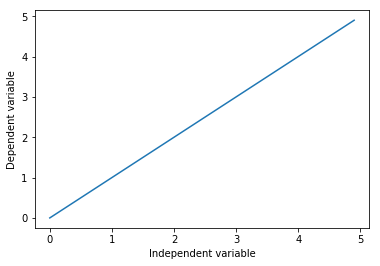

In [4]:
plt.plot(X, Y)
plt.ylabel("Dependent variable")
plt.xlabel("Independent variable")
plt.show()

When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So how is this "regression" performed?

<hr>
<a id="ref2"></a>
<h1>Linear Regression with TensorFlow</h1>
A simple example of a linear function can help us understand the basic mechanism behind TensorFlow.

For the first part we will use a sample dataset, and then we'll use TensorFlow to adjust and get the right parameters. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. 

In [5]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-05-23 23:48:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2019-05-23 23:48:54 (1.64 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64">Dataset source</a>

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [7]:
df_FuelConsumption = pd.read_csv('FuelConsumption.csv')

In [8]:
# take a look at the dataset
df_FuelConsumption.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:

In [24]:
train_x = df_FuelConsumption['ENGINESIZE']

In [25]:
type(train_x)

pandas.core.series.Series